In [1]:
import torch
import requests
import matplotlib.pyplot as plt

In [2]:
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
r = requests.get(iris_url)
open('iris.data', 'wb').write(r.content)

vectors =[] 
answers =[] #답

with open('iris.data', 'r') as f:
    for line in f:
        line = line.strip()
        if len(line) != 0:
            items = line.split(",")
            vectors.append([float(x) for x in items[:4]])
            answers.append(items[4])
            
species = {a: i for i, a in enumerate(set(answers))}

In [3]:
X = torch.FloatTensor(vectors)
Z = X-X.mean(axis = 0)

## PCA를 위함 함수 정의

In [4]:
#분산을 최대로하는 w벡터 찾기

def findPC(Z):
    w = torch.randn(Z.shape[1])
    w = w/(torch.dot(w,w))**0.5
    
    lr = 0.1
    
    for epoch in range(1001):
        w.requires_grad_(True)
        variance = torch.mean(torch.sum(Z * w, dim = 1) ** 2)
        
        variance.backward()
        
        with torch.no_grad():
            w = w + lr * w.grad
            w = w/(torch.dot(w,w)) ** 0.5
            
    return w, variance.item()

In [5]:
# findPC 함수
findPC(Z)

(tensor([-0.3616,  0.0823, -0.8566, -0.3588]), 4.196674823760986)

In [6]:
#순서대로 주성분 찾기
def PCA(Z, n):
    W, V = [], []
    
    for _ in range(n):
        w, v = findPC(Z)
        W.append(w.tolist())
        V.append(v)
        Z = Z -(Z @ w.unsqueeze(1)) * w
        
    return W, V

In [7]:
# 각 축이 주성분이 되도록 기존 데이터를 변경
def transform(Z, W):
    return Z @ torch.Tensor(W).T

In [8]:
#PCA 구하기
W, V = PCA(Z, 4)
K = transform(Z, W)

## 데이터 변경 전과 후

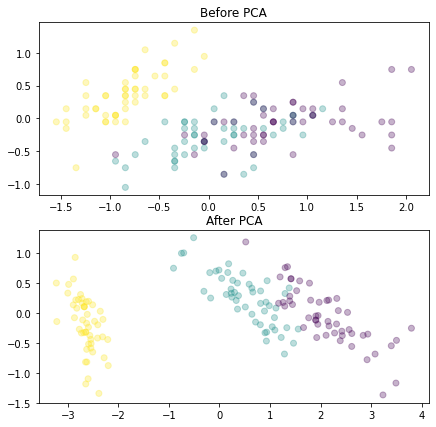

In [9]:
fig, ax = plt.subplots(2, 1, figsize = (7,7))

ax[0].scatter(Z[:,0], Z[:,1], c = [species[a] for a in answers], alpha = 0.3)
ax[0].set_title('Before PCA')

ax[1].scatter(K[:,0], K[:,1], c = [species[a] for a in answers], alpha = 0.3)
ax[1].set_title('After PCA')
plt.show()

## Scree plot 그리기

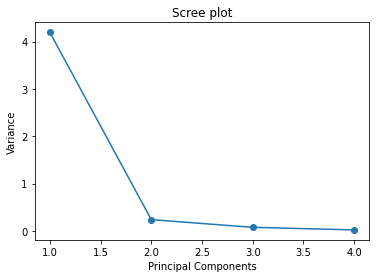

In [10]:
# 각 PC별 분산 값 확인
plt.title('Scree plot')
plt.xlabel('Principal Components')
plt.ylabel('Variance')
plt.plot(range(1, len(V)+1), V, "-o")
plt.show()